<a href="https://www.pieriandata.com"><img src="../Pierian_Data_Logo.PNG"></a>
<strong><center>Copyright by Pierian Data Inc.</center></strong> 
<strong><center>Created by Jose Marcial Portilla.</center></strong>
# CIFAR-10 Multiple Classes

Let's go over another example of using Keras and building out CNNs. This time will use another famous data set, the CIFAR-10 dataset which consists of 10 different image types.

In [1]:
import pandas as pd
import numpy as np

-----

# The Data

CIFAR-10 is a dataset of 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.

In [2]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 6d958be074577803d12ecdefd02955f39262c83c16fe9348329d7fe0b5c001ce so we will re-download the data.
170500096/170498071 [==============================] - 2433s 14us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_train[0].shape

(32, 32, 3)

In [5]:
import matplotlib.pyplot as plt

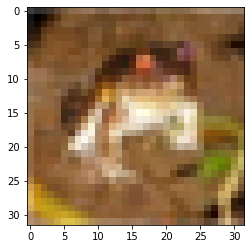

In [6]:
# FROG
plt.imshow(x_train[0])

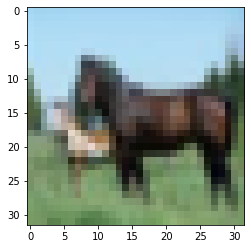

In [7]:
# HORSE
plt.imshow(x_train[12])

# PreProcessing

In [8]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [9]:
x_train[0].shape

(32, 32, 3)

In [10]:
x_train.max()

255

In [11]:
x_train = x_train/225

In [12]:
x_test = x_test/255

In [13]:
x_train.shape

(50000, 32, 32, 3)

In [14]:
x_test.shape

(10000, 32, 32, 3)

## Labels

In [15]:
from tensorflow.keras.utils import to_categorical

In [16]:
y_train.shape

(50000, 1)

In [17]:
y_train[0]

array([6], dtype=uint8)

In [18]:
y_cat_train = to_categorical(y_train,10)

In [19]:
y_cat_train.shape

(50000, 10)

In [20]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [21]:
y_cat_test = to_categorical(y_test,10)

----------
# Building the Model

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [23]:
model = Sequential()

## FIRST SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

## SECOND SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 256 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(256, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [25]:
from tensorflow.keras.callbacks import EarlyStopping

In [26]:
early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [27]:
model.fit(x_train,y_cat_train,epochs=15,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 32s 647us/sample - loss: 1.5102 - accuracy: 0.4589 - val_loss: 1.3034 - val_accuracy: 0.5467
Epoch 2/15
50000/50000 [==============================] - 34s 681us/sample - loss: 1.1610 - accuracy: 0.5936 - val_loss: 1.1273 - val_accuracy: 0.6076
Epoch 3/15
50000/50000 [==============================] - 33s 652us/sample - loss: 1.0105 - accuracy: 0.6494 - val_loss: 1.1116 - val_accuracy: 0.6169
Epoch 4/15
50000/50000 [==============================] - 31s 616us/sample - loss: 0.9074 - accuracy: 0.6864 - val_loss: 1.0603 - val_accuracy: 0.6440
Epoch 5/15
50000/50000 [==============================] - 31s 626us/sample - loss: 0.8230 - accuracy: 0.7167 - val_loss: 0.9585 - val_accuracy: 0.6692
Epoch 6/15
50000/50000 [==============================] - 32s 632us/sample - loss: 0.7573 - accuracy: 0.7418 - val_loss: 1.1698 - val_accuracy: 0.6345
Epoch 7/15
50000/50000 [====================

In [28]:
# Careful, don't overwrite our file!
# model.save('cifar_10epochs.h5')

In [29]:
losses = pd.DataFrame(model.history.history)

In [43]:
losses

,loss,accuracy,val_loss,val_accuracy
0,1.510165,0.45888,1.303355,0.5467
1,1.160979,0.59360,1.127270,0.6076
2,1.010512,0.64944,1.111612,0.6169
3,0.907395,0.68640,1.060306,0.6440
4,0.823018,0.71674,0.958549,0.6692
5,0.757343,0.74182,1.169813,0.6345
6,0.705122,0.76002,1.075943,0.6615
7,0.661719,0.77490,1.105585,0.6803


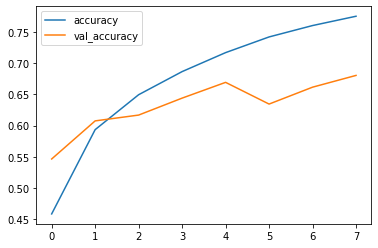

In [44]:
losses[['accuracy','val_accuracy']].plot()

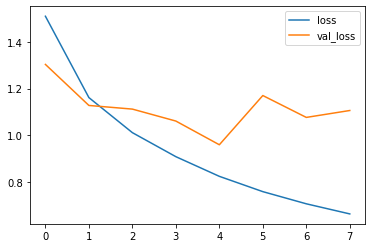

In [45]:
losses[['loss','val_loss']].plot()

In [46]:
model.metrics_names

['loss', 'accuracy']

In [47]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[1.105585207080841, 0.6803]


In [35]:
from sklearn.metrics import classification_report,confusion_matrix

predictions = model.predict_classes(x_test)

In [36]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.70      0.79      0.74      1000
           1       0.77      0.86      0.81      1000
           2       0.72      0.47      0.57      1000
           3       0.47      0.49      0.48      1000
           4       0.54      0.77      0.63      1000
           5       0.52      0.66      0.58      1000
           6       0.75      0.79      0.77      1000
           7       0.83      0.66      0.73      1000
           8       0.85      0.72      0.78      1000
           9       0.88      0.60      0.72      1000

    accuracy                           0.68     10000
   macro avg       0.70      0.68      0.68     10000
weighted avg       0.70      0.68      0.68     10000



In [37]:
confusion_matrix(y_test,predictions)

array([[785,  23,  26,  28,  46,  11,   9,   6,  49,  17],
       [ 13, 858,   8,  19,  20,  11,  13,   3,  22,  33],
       [ 76,   7, 474,  81, 158, 121,  63,  12,   6,   2],
       [ 15,   7,  35, 492, 121, 227,  63,  26,   9,   5],
       [ 33,   1,  27,  48, 765,  49,  36,  35,   4,   2],
       [ 10,   4,  30, 161,  75, 663,  27,  27,   1,   2],
       [  6,   1,  28,  66,  63,  45, 785,   3,   3,   0],
       [ 17,   4,  16,  49, 130, 111,  11, 656,   2,   4],
       [120,  53,   6,  38,  13,  16,  10,   6, 725,  13],
       [ 53, 152,   8,  61,  22,  25,  24,  21,  34, 600]])

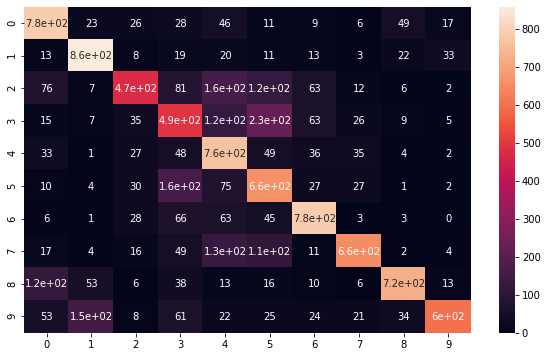

In [38]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)
# https://github.com/matplotlib/matplotlib/issues/14751

# Predicting a given image

In [39]:
my_image = x_test[16]

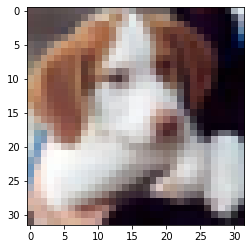

In [40]:
plt.imshow(my_image)

In [41]:
# SHAPE --> (num_images,width,height,color_channels)
model.predict_classes(my_image.reshape(1,32,32,3))

array([5])

In [42]:
# 5 is DOG
# https://www.cs.toronto.edu/~kriz/cifar.html